In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
## example with rolling a die

# die probabilities (weighted)
f1 = 2/8
f2 = 2/8
f3 = 1/8
f4 = 1/8
f5 = 1/8
f6 = 1/8

# confirm sum to 1
print('확률의 합 = %g'%(f1+f2+f3+f4+f5+f6))

# expected value
expval = 1*f1 + 2*f2 + 3*f3 + 4*f4 + 5*f5 + 6*f6
print('기댓값 = %g'%expval)

# generate 'population'
population = [1,1,2,2,3,4,5,6,]
for i in range(20):
    population = np.hstack((population,population))

nPop = len(population)
print('모집단의 수 = %g'%nPop)

# draw sample of 8 rolls
sample = np.random.choice(population,8)
print('표본평균 = %g'%sample.mean())

확률의 합 = 1
기댓값 = 3
모집단의 수 = 8.38861e+06
표본평균 = 2.5


In [51]:
population[1]

1

3.001397029671289


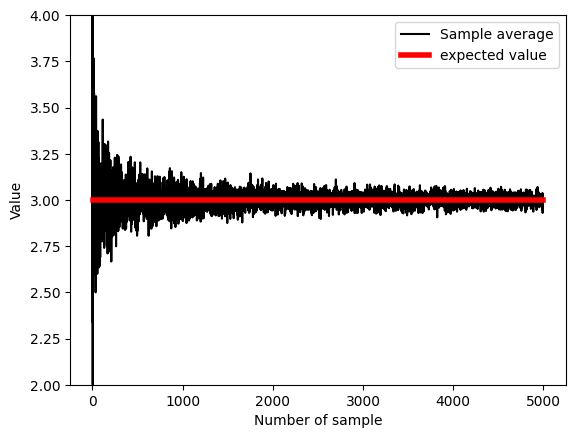

In [53]:
## experiment: draw Larger and Larger samples

k = 5000
sampleAve = np.zeros(k)

for i in range(k):
    idx = np.floor(np.random.rand(i+1)*nPop) # 인덱스는 단수가 아니라 복수임
    sampleAve[i] = np.mean(population[idx.astype(int)])


plt.plot(sampleAve,'k')
plt.plot([1,k],[expval,expval],'r',linewidth=4)
plt.xlabel('Number of sample')
plt.ylabel('Value')
plt.ylim([expval-1,expval+1])
plt.legend(('Sample average','expected value'))

# mean of samples converges to population estimate quickly
print(np.mean(sampleAve))

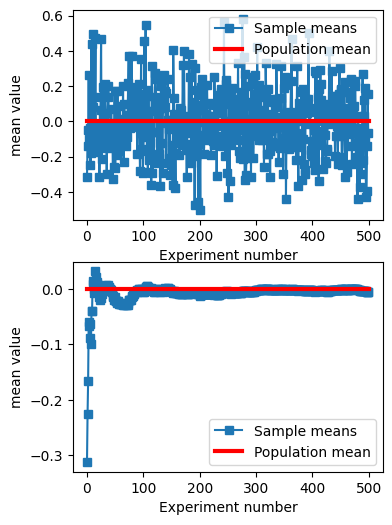

In [55]:

# generate population data with known mean
populationN = 1000000
population = np.random.randn(populationN)
# 표본 변동성 계산 
population = population - np.mean(population)# 표본값-평균값을 하여 중앙값을 0으로 조정(결과를 잘 보기 위해)

# now we draw a random sample from that population
# 표본낼 샘플의 수
samplesize= 30
numberOfExps = 500
samplemeans = np.zeros(numberOfExps)

for expi in range(numberOfExps):
    # get a sample and compute its mean
    sampleidx = np.random.randint(0,populationN,samplesize)
    samplemeans[expi] = np.mean(population[sampleidx])
    
# show the results!
fig, ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(samplemeans,'s-')
ax[0].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[0].set_xlabel('Experiment number')
ax[0].set_ylabel('mean value')
ax[0].legend(('Sample means','Population mean'))

ax[1].plot(np.cumsum(samplemeans)/np.arange(1,numberOfExps+1),'s-') # 누적합마다 합한 수 만큼 나누어 누적평균 산출
ax[1].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[1].set_xlabel('Experiment number')
ax[1].set_ylabel('mean value')
ax[1].legend(('Sample means','Population mean'))

plt.show()

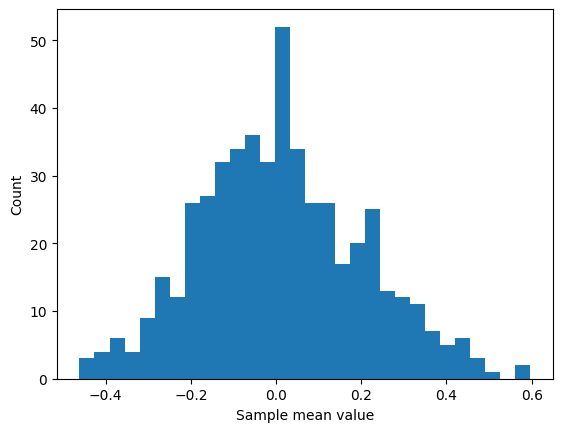

In [25]:
## some foreshadowing...

plt.hist(samplemeans,30)
plt.xlabel('Sample mean value')
plt.ylabel('Count')
plt.show()